In [53]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer

In [13]:
df=pd.read_csv("netflix_dataset.csv")
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


<Axes: xlabel='type', ylabel='count'>

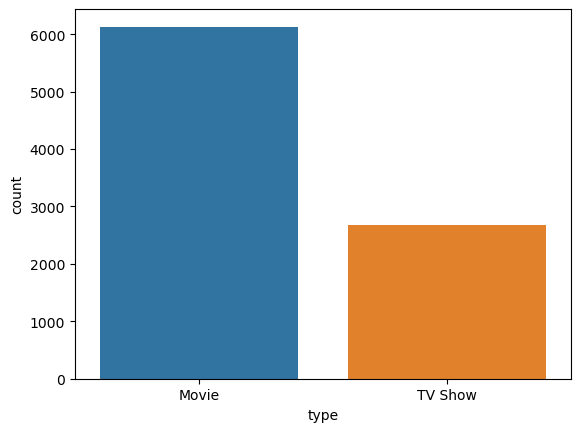

In [32]:
sns.countplot(x="type",data=df)

<Axes: xlabel='rating', ylabel='count'>

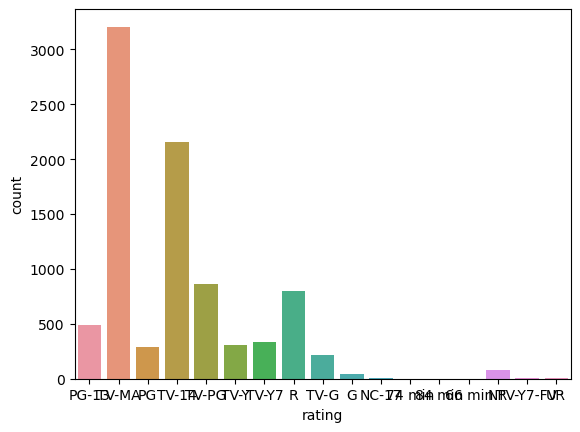

In [33]:
sns.countplot(x="rating",data=df)

<Axes: xlabel='release_year', ylabel='Count'>

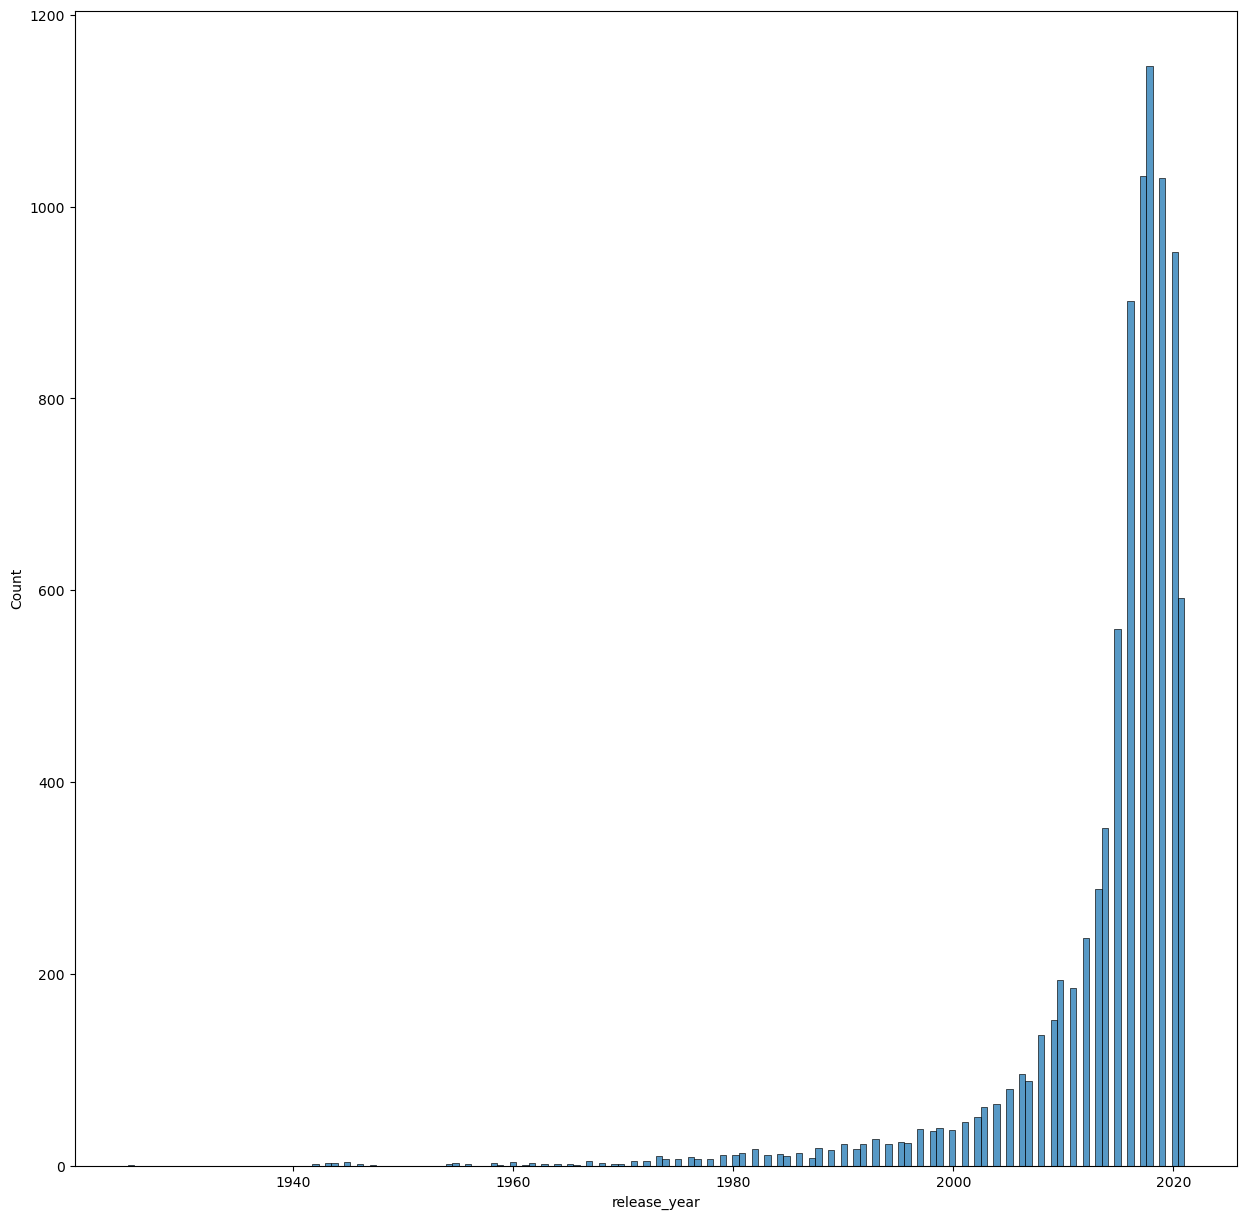

In [37]:
plt.figure(figsize=(15, 15))
sns.histplot(x="release_year",data=df)

<Axes: ylabel='count'>

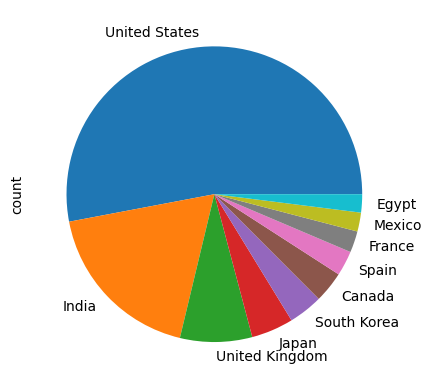

In [52]:
from matplotlib.pyplot import annotate


cnt=df["country"].value_counts().sort_values(ascending=False)
cnt=cnt[:10]
cnt.plot(kind="pie")

In [55]:
df["genre"]=df["listed_in"].apply(lambda x: x.replace(' ,',',').replace(', ',',').split(','))
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,genre
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",[Documentaries]
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...","[International TV Shows, TV Dramas, TV Mysteries]"
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,"[Crime TV Shows, International TV Shows, TV Ac..."
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...","[Docuseries, Reality TV]"
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,"[International TV Shows, Romantic TV Shows, TV..."


In [57]:
mlb=MultiLabelBinarizer()

In [68]:
mlb_df=pd.DataFrame(mlb.fit_transform(df["genre"]),columns=mlb.classes_)

<Axes: >

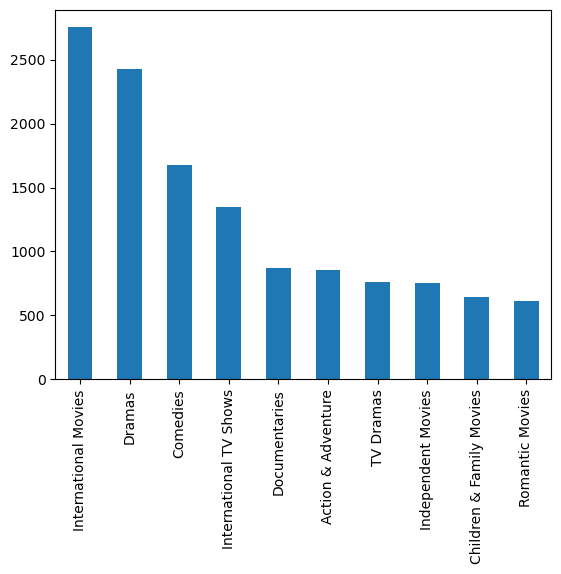

In [73]:
mlb_df.sum().sort_values(ascending=False)[:10].plot(kind="bar")

In [90]:
print("Top 10 most correlated features are: ")
mlb_df.corr().unstack().sort_values(ascending=False).drop_duplicates().head(10)

Top 10 most correlated features are: 


Action & Adventure         Action & Adventure        1.000000
Science & Nature TV        Docuseries                0.452562
TV Dramas                  International TV Shows    0.444622
Romantic TV Shows          International TV Shows    0.405582
Dramas                     International Movies      0.397291
                           Independent Movies        0.344427
TV Sci-Fi & Fantasy        TV Action & Adventure     0.336464
TV Horror                  TV Mysteries              0.331787
International TV Shows     Crime TV Shows            0.318076
Spanish-Language TV Shows  International TV Shows    0.290500
dtype: float64

In [96]:
df=pd.read_csv("netflix_dataset.csv")
df["title"]=df["title"].fillna('')
df["listed_in"]=df["listed_in"].fillna('')

df["description"]=df["description"].fillna('')

df["data"]=df["title"]+df["listed_in"]+df["description"]

In [97]:
df["data"]=df["data"].str.lower()

In [98]:
vectorizer=TfidfVectorizer(stop_words="english")

In [109]:
mat=vectorizer.fit_transform(df["data"])
mat.shape

(8807, 30132)

In [105]:
simi=cosine_similarity(mat,mat)

In [115]:
simi.shape
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,data
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",dick johnson is deaddocumentariesas her father...
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...","blood & waterinternational tv shows, tv dramas..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,"ganglandscrime tv shows, international tv show..."
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...","jailbirds new orleansdocuseries, reality tvfeu..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,"kota factoryinternational tv shows, romantic t..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...","zodiaccult movies, dramas, thrillersa politica..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...","zombie dumbkids' tv, korean tv shows, tv comed..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,"zombielandcomedies, horror movieslooking to su..."
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...","zoomchildren & family movies, comediesdragged ..."


In [125]:
def recommend(movie):
    idx=df[df["title"]==movie].index[0]
    sim_movies=list(enumerate(simi[idx]))
    sim_movies=sorted(sim_movies,key=lambda x: x[1],reverse=True)[1:11]
    #print(sim_movies)
    idxs=[i[0] for i in sim_movies]
    return df["title"].iloc[idxs]

In [126]:
recommendations = recommend("Zodiac")
print("Recommended Movies:")
print(recommendations)

Recommended Movies:
5952         Victim of Beauty
3065                  Messiah
4453    No One Killed Jessica
6379        Brooklyn's Finest
6212              Bad Boys II
6007              3 Deewarein
2220     Ip Man 4: The Finale
200           Krishna Cottage
3090          Blitz Patrollie
3966           The Highwaymen
Name: title, dtype: object
